In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers  #tensorflow and tensorflow.keras for defining and training the CNN model, keras provides tools to build, train, and evaluate neural networks
from tensorflow.keras.utils import to_categorical


a. Loading and preprocessing the image data

In [2]:
mnist_train=pd.read_csv('./mnist_train.csv')
x_train=mnist_train.drop('label',axis=1).values
y_train=mnist_train['label'].values

print(x_train.shape)
print(y_train.shape)


(60000, 784)
(60000,)


In [3]:
mnist_test=pd.read_csv('./mnist_test.csv')
x_test=mnist_test.drop('label',axis=1).values
y_test=mnist_test['label'].values

print(x_test.shape)
print(y_test.shape)


(10000, 784)
(10000,)


In [4]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

b. Defining the model's architecture

In [6]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\nahus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c. Training the model

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9064 - loss: 0.3151 - val_accuracy: 0.9828 - val_loss: 0.0561
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9862 - loss: 0.0476 - val_accuracy: 0.9863 - val_loss: 0.0382
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9892 - loss: 0.0329 - val_accuracy: 0.9898 - val_loss: 0.0335
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9874 - val_loss: 0.0369
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9897 - val_loss: 0.0321
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.9902 - val_loss: 0.0336
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9910 - val_loss: 0.0328
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9975 - loss: 

d. Estimating the model's performance

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9863 - loss: 0.0597
Test accuracy: 0.9896000027656555


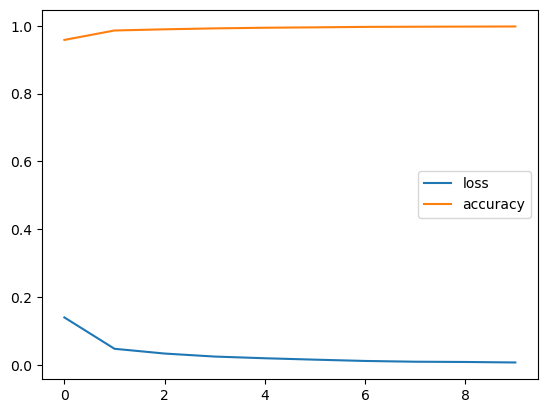

In [9]:
plt.plot(history.history['loss'],label=('loss'))
plt.plot(history.history['accuracy'],label=('accuracy'))
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Actual Number:  0
Predicted Number:  0


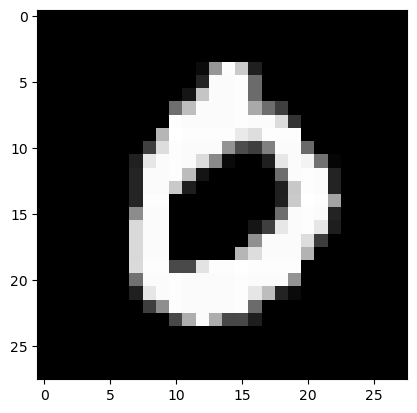

In [10]:
n = 3
plt.imshow(x_test[n].reshape(28, 28), "gray")

predicted_value = model.predict(x_test)

print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

In [11]:
'''
Here's a detailed explanation of the code with potential viva questions and answers. 
This includes line-by-line code analysis, as well as the purpose and significance of each component.

---

### Code Explanation

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
```
**Explanation**: These are import statements for libraries essential to building, training, and evaluating a Convolutional Neural Network (CNN):
- `numpy` for numerical operations.
- `pandas` for data handling.
- `matplotlib.pyplot` for data visualization.
- `tensorflow` and `tensorflow.keras` for defining and training the CNN model.

**Viva Questions**:
1. **Why do we need `numpy` in this code?**  
   - It is useful for numerical operations on arrays, though it's used minimally here.

2. **What is the role of `tensorflow.keras`?**  
   - It provides tools to build, train, and evaluate neural networks.

---

```python
mnist_train=pd.read_csv('./mnist_train.csv')
x_train=mnist_train.drop('label',axis=1).values
y_train=mnist_train['label'].values
```
**Explanation**: Loads the MNIST training data from a CSV file, 
separates features (`x_train`) and labels (`y_train`). The `.values`
attribute converts them into NumPy arrays, necessary for model training.

**Viva Questions**:
1. **What does `pd.read_csv` do?**  
   - It reads data from a CSV file into a pandas DataFrame.

2. **Why use `.values` here?**  
   - To convert the pandas DataFrame into a NumPy array, as Keras requires input data in array format.

---

```python
print(x_train.shape)
print(y_train.shape)
```
**Explanation**: Prints the shape of `x_train` and `y_train` to verify the data dimensions
. The expected output shapes are `(60000, 784)` and `(60000,)`, representing 60,000 images 
of 784 pixels each (28x28 flattened) and 60,000 labels, respectively.

**Viva Question**:
1. **Why check `x_train.shape` and `y_train.shape`?**  
   - To confirm the data is correctly loaded and formatted before training.

---

```python
mnist_test=pd.read_csv('./mnist_test.csv')
x_test=mnist_test.drop('label',axis=1).values
y_test=mnist_test['label'].values
```
**Explanation**: Loads the MNIST testing data, separates the pixel values (`x_test`) and labels (`y_test`), and converts them to NumPy arrays.

**Viva Question**:
1. **What does `axis=1` mean in `drop`?**  
   - It specifies dropping the column named "label".

---

```python
print(x_test.shape)
print(y_test.shape)
```
**Explanation**: Prints the shape of `x_test` and `y_test` to confirm test data dimensions.
The expected output shapes are `(10000, 784)` for `x_test` and `(10000,)` for `y_test`, indicating 10,000 test samples.

---

```python
x_train = x_train / 255.0
x_test = x_test / 255.0
```
**Explanation**: Normalizes the pixel values of `x_train` and `x_test` by dividing by 255, bringing the values to a [0, 1] range, 
which accelerates model convergence.

**Viva Questions**:
1. **Why normalize pixel values?**  
   - To standardize the input data for faster training and to prevent large values from causing numerical instability.

2. **Why divide by 255?**  
   - Since pixel values range from 0 to 255, dividing by 255 scales them to a [0, 1] range.

---

```python
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
```
**Explanation**: Reshapes `x_train` and `x_test` into 28x28 pixel images with 1 channel (grayscale). `-1` infers the batch size automatically.

**Viva Questions**:
1. **Why reshape to `(28, 28, 1)`?**  
   - The CNN expects 2D images (28x28 pixels) with a single channel for grayscale input.

2. **What does `-1` in reshape mean?**  
   - It allows Python to automatically determine the batch size based on data dimensions.

---

```python
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
```
**Explanation**: Converts `y_train` and `y_test` to one-hot encoded vectors, where each class label becomes a binary vector 
(e.g., label 3 becomes `[0,0,0,1,0,0,0,0,0,0]`).

**Viva Questions**:
1. **What is one-hot encoding?**  
   - It's a binary representation where each class label is represented by a vector with a single `1` and remaining `0`s.

2. **Why use `to_categorical`?**  
   - It converts labels into a format suitable for multi-class classification with `categorical_crossentropy` loss.

---

```python
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
```
**Explanation**: Defines a Sequential CNN model:
- `Conv2D(32, (3,3), activation='relu')`: A convolutional layer with 32 filters, 3x3 kernel, and ReLU activation.
- `MaxPooling2D((2,2))`: Reduces spatial dimensions by 2x2 pooling.
- `Conv2D(64, (3,3), activation='relu')`: Another convolutional layer with 64 filters and ReLU activation.
- `Flatten()`: Converts 2D feature maps into a 1D vector.
- `Dense(64, activation='relu')`: A fully connected layer with 64 neurons and ReLU activation.
- `Dense(10, activation='softmax')`: Output layer with 10 neurons (for 10 classes) and softmax for class probabilities.

**Viva Questions**:
1. **What is the purpose of convolutional layers?**  
   - To detect patterns and features in the image (e.g., edges, textures).

2. **Why use `MaxPooling2D`?**  
   - It reduces the spatial dimensions of feature maps, retaining important features while decreasing computational load.

3. **Why `softmax` in the output layer?**  
   - It provides probabilities for each class, making it suitable for multi-class classification.

---

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```
**Explanation**: Compiles the model with:
- `optimizer='adam'`: Adaptive learning rate optimization for faster and more efficient convergence.
- `loss='categorical_crossentropy'`: Loss function for multi-class classification with one-hot encoded labels.
- `metrics=['accuracy']`: Measures accuracy during training.

**Viva Questions**:
1. **What is `Adam` optimizer?**  
   - An optimization algorithm that adjusts learning rates dynamically, often faster than basic SGD.

2. **Why `categorical_crossentropy` for the loss?**  
   - It measures the difference between predicted and actual label distributions, ideal for multi-class classification.

---

```python
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
```
**Explanation**: Trains the model with `x_train` and `y_train` for 10 epochs. 
`validation_data` is used to check model performance on test data after each epoch.

**Viva Questions**:
1. **What is an epoch?**  
   - A single pass through the entire training dataset.

2. **What is the purpose of validation data?**  
   - To monitor model performance on unseen data during training, helping detect overfitting.

---

```python
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
```
**Explanation**: Evaluates the model on test data, outputting loss and accuracy, which reflect model generalization on unseen data.

**Viva Questions**:
1. **Why use `evaluate` on test data?**  
   - To check how well the model generalizes to new data not seen during training.

2. **What does `test_acc` indicate?**  
   - The accuracy of the model on the test dataset.

---

```python
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
```
**Explanation**: Plots the training loss and accuracy across epochs to visualize the training process.

**Viva Questions**:
1. **Why plot loss and accuracy?**  
   - To understand the model's learning progress, observe convergence, and check for overfitting.

---

```python
n = 3
plt
'''

'\nHere\'s a detailed explanation of the code with potential viva questions and answers. This includes line-by-line code analysis, as well as the purpose and significance of each component.\n\n---\n\n### Code Explanation\n\n```python\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport tensorflow as tf\nfrom tensorflow.keras import models, layers\nfrom tensorflow.keras.utils import to_categorical\n```\n**Explanation**: These are import statements for libraries essential to building, training, and evaluating a Convolutional Neural Network (CNN):\n- `numpy` for numerical operations.\n- `pandas` for data handling.\n- `matplotlib.pyplot` for data visualization.\n- `tensorflow` and `tensorflow.keras` for defining and training the CNN model.\n\n**Viva Questions**:\n1. **Why do we need `numpy` in this code?**  \n   - It is useful for numerical operations on arrays, though it\'s used minimally here.\n\n2. **What is the role of `tensorflow.keras`?**  \n   - It provi